In [1]:
from wholeslidedata.image.wholeslideimage import WholeSlideImage
from wholeslidedata.annotation.wholeslideannotation import WholeSlideAnnotation
from wholeslidedata.annotation.utils import plot_annotations
from matplotlib import pyplot as plt
from pprint import pprint
from wholeslidedata.annotation import utils as annotation_utils
from wholeslidedata.iterators import create_batch_iterator
import numpy as np
from matplotlib import pyplot as plt
from shapely.prepared import prep
from plot_utils import init_plot, plot_batch, show_plot

In [2]:
path_to_wsi = "/home/vishwesh/Projects/pathology-whole-slide-data/images/103732.svs"
path_to_xml = "/home/vishwesh/Projects/pathology-whole-slide-data/images/sedeen/103732.session.xml"

### WholeSlideImage Object



WSI properties
---------------

available spacing in /home/vishwesh/Projects/pathology-whole-slide-data/images/103732.svs:
[0.2526, 1.0104285301421048, 4.042064874903855, 8.08478319507333]

shapes in /home/vishwesh/Projects/pathology-whole-slide-data/images/103732.svs:
((99007, 76422), (24751, 19105), (6187, 4776), (3093, 2388))

downsampling ratios in /home/vishwesh/Projects/pathology-whole-slide-data/images/103732.svs:
(1.0, 4.00011294593074, 16.001840359872745, 32.00626759728159)

closest real spacing from rounded spacing: 0.5 = 0.2526

size given spacing: shape at spacing 0.5 = (99007, 76422)



Patch and Slide extraction
---------------



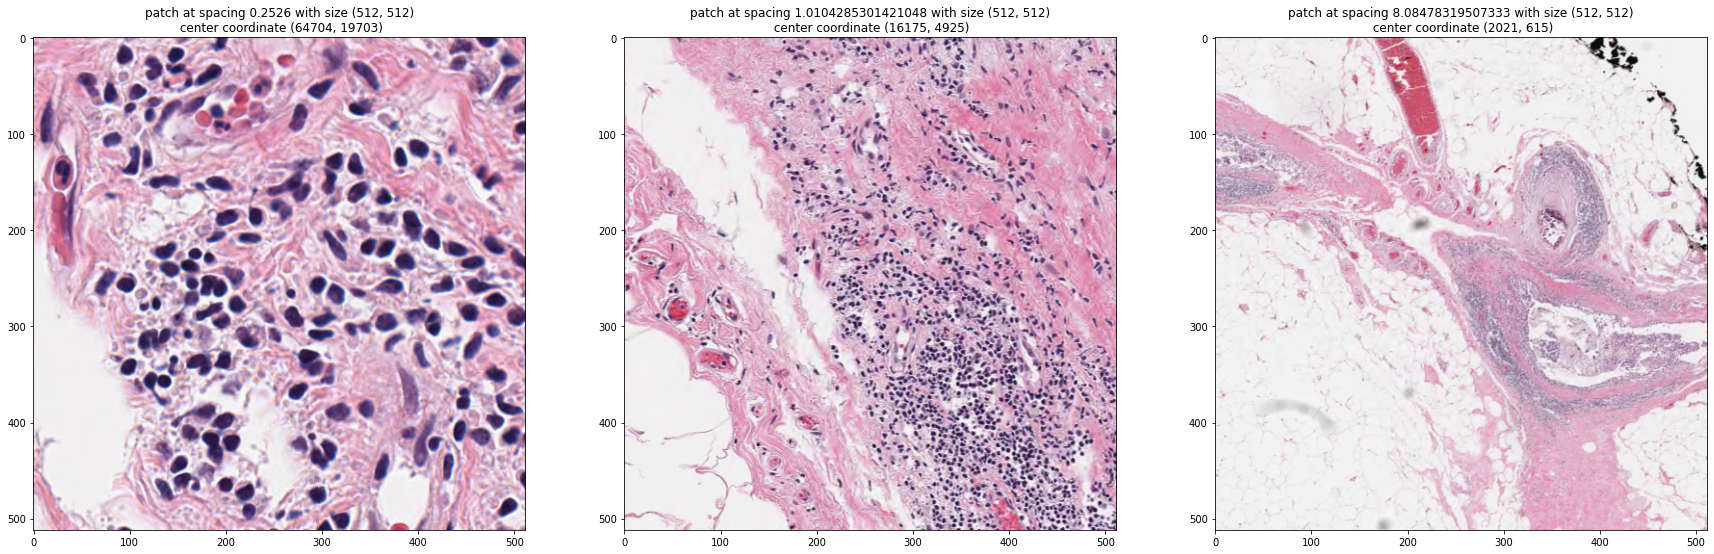

In [4]:
x_orig,y_orig = 64704, 19703
width, height = 512, 512

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

with WholeSlideImage(path_to_wsi, backend='openslide') as wsi:
    print('\n\nWSI properties\n---------------\n')
    # print some properties
    print(f'available spacing in {wsi.path}:\n{wsi.spacings}\n')
    print(f'shapes in {wsi.path}:\n{wsi.shapes}\n')
    print(f'downsampling ratios in {wsi.path}:\n{wsi.downsamplings}\n')
    print(f'closest real spacing from rounded spacing: 0.5 = {wsi.get_real_spacing(0.5)}\n')
    print(f'size given spacing: shape at spacing 0.5 = {wsi.shapes[wsi.get_level_from_spacing(0.5)]}\n')

    print('\n\nPatch and Slide extraction\n---------------\n')
    # extract a patch with center coordinates xy at spacing 0.5
    spacing = 0.5
    patch = wsi.get_patch(x_orig, y_orig, width, height, spacing,relative=True)

    # plot patch
    axes[0].imshow(patch)
    axes[0].set_title(f'patch at spacing {wsi.get_real_spacing(spacing)} with size {width, height}\n center coordinate {x_orig,y_orig}')

    spacing = 2.0
    downsample_factor = wsi.get_real_spacing(spacing)/wsi.get_real_spacing(0.5)
    x = int(x_orig/downsample_factor)
    y = int(y_orig/downsample_factor)
    # extract a patch with center coordinates xy at spacing 2.0
    patch = wsi.get_patch(x, y, width, height, spacing,relative=True)

    # plot patch
    axes[1].imshow(patch)
    axes[1].set_title(f'patch at spacing {wsi.get_real_spacing(spacing)} with size {width, height}\n center coordinate {x,y}')

    # extract the whole slide
    spacing=8.0
    downsample_factor = wsi.get_real_spacing(spacing)/wsi.get_real_spacing(0.5)
    x = int(x_orig/downsample_factor)
    y = int(y_orig/downsample_factor)
    # extract a patch with center coordinates xy at spacing 2.0
    patch = wsi.get_patch(x, y, width, height, spacing,relative=True)

    # plot patch
    axes[2].imshow(patch)
    axes[2].set_title(f'patch at spacing {wsi.get_real_spacing(spacing)} with size {width, height}\n center coordinate {x,y}')
    plt.show()

### WholseSlideAnnotation Objects


label_map: {'tumor': 2, 'tils': 1, 'cell': 4, 'calcification': 3}

counts per label:  {'tumor': 8, 'tils': 79, 'cell': 10, 'calcification': 1}

pixels per label:  {'tumor': 91787920, 'tils': 464172, 'cell': 31640, 'calcification': 125840}


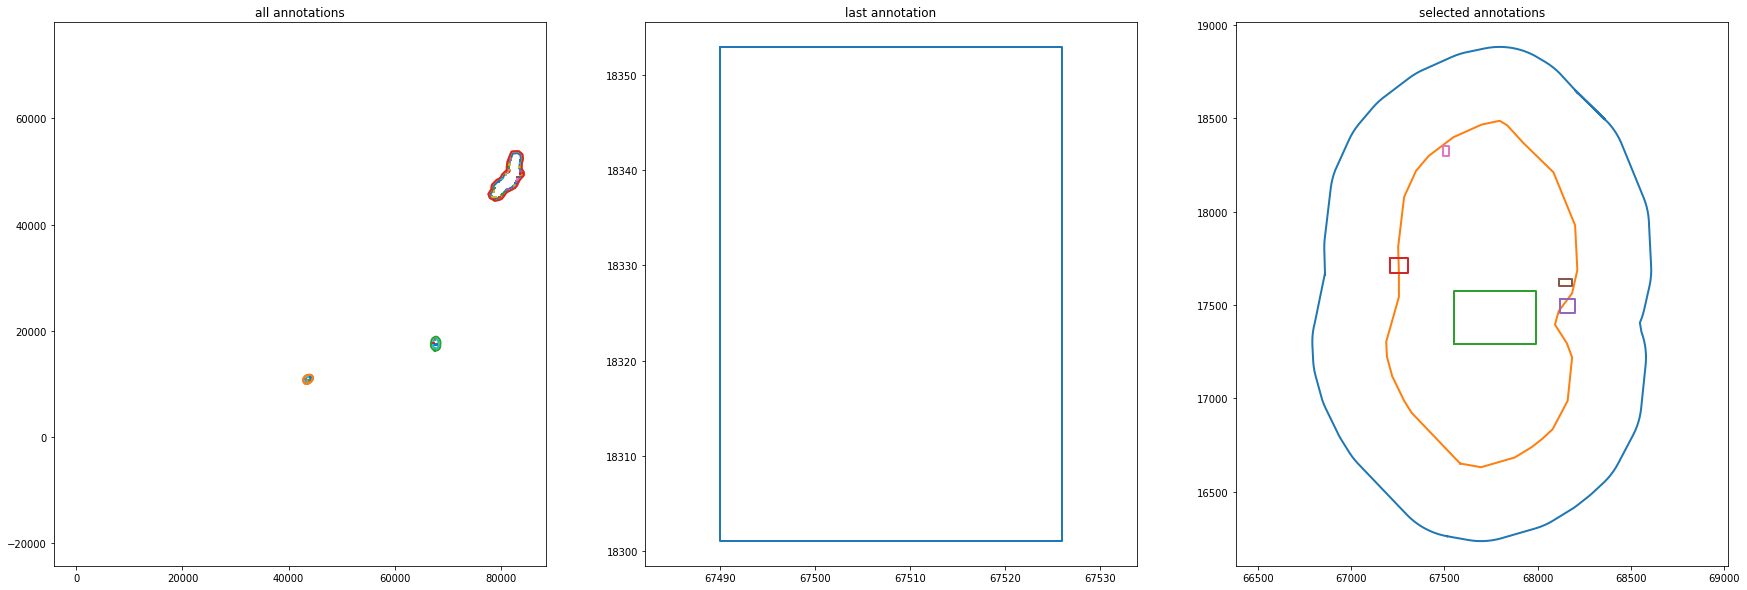

In [8]:
wsa = WholeSlideAnnotation(path_to_xml, parser="sedeen", labels=["ffff00ff","00ff00ff","000000ff","00ffffff"], renamed_labels=["tils","tumor","calcification","cell"])
print(f'\nlabel_map: {wsa.labels.map}')
print(f'\ncounts per label:  {annotation_utils.get_counts_in_annotations(wsa.annotations, wsa.labels)}')
print(f'\npixels per label:  {annotation_utils.get_pixels_in_annotations(wsa.annotations, wsa.labels)}')

"""
After creating a whole slide annotation, we can plot all the annotation within itL
"""

fig, axes = plt.subplots(1,3, figsize=(30,10))
annotations = wsa.annotations
plot_annotations(annotations, axes[0], title='all annotations')


"""
We can also plot a specific annotattion for example the last annotation
"""

annotations = wsa.annotations
annotation = annotations[-1]
plot_annotations([annotation], axes[1], title='last annotation')


"""
Furthemore we can select all annotations in a specific region based on a center coordinate, a width and a heigth. 
"""

center = wsa.annotations[-1].center
width, height = 10000, 10000

selected_annotations = wsa.select_annotations(*center, width, height)

plot_annotations(selected_annotations, axes[2], title='selected annotations')
plt.show()

### Batch Iterator: Infinite Generator

/home/vishwesh/Projects/pathology-whole-slide-data/wholeslidedata/image/wholeslideimage.py:79: UserWarning: spacing 0.5 outside margin (0.3%) for [0.2526, 1.0104285301421048, 4.042064874903855, 8.08478319507333], returning closest spacing: 0.2526
  warnings.warn(


{'103732': {'tumor': 8, 'tils': 79, 'cell': 10, 'calcification': 1}}
{'tumor': 91787920, 'tils': 464172, 'cell': 31640, 'calcification': 125840}


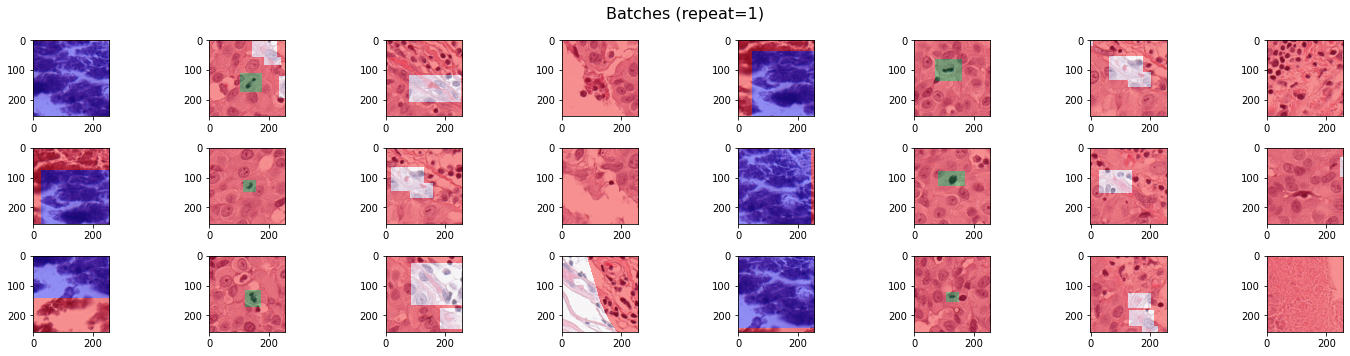

(x,y) coordinates: POINT (67622.91256416083 17353.607340497205)
(x,y) coordinates: POINT (83126.82693937454 48979.005787117385)
(x,y) coordinates: POINT (82607.05345277328 47496.68156176345)
(x,y) coordinates: POINT (43333.139734110875 10369.447774351502)
(x,y) coordinates: POINT (67703.38363657272 17357.98756673857)
(x,y) coordinates: POINT (83093.22977617504 48824.80807035449)
(x,y) coordinates: POINT (82753.54878020691 47708.429731641314)
(x,y) coordinates: POINT (67198.52282007929 17226.400785574864)


In [20]:
user_config = '/home/vishwesh/Projects/pathology-whole-slide-data/notebooks/configs/sedeen_user_config.yml'
# batches = 2 # how many batches that are going to be sampled, batchgenerator will be reset afterwards
repeats = 3
cpus = 1
mode = 'training'

with create_batch_iterator(user_config=user_config, 
                            mode=mode, 
                            cpus=cpus) as training_batch_generator:
    print(training_batch_generator.dataset.annotations_per_label_per_key)
    print(training_batch_generator.dataset.pixels_per_label)
    fig, axes = init_plot(repeats, training_batch_generator.batch_size)
    for idx, (x_batch, y_batch, info) in enumerate(training_batch_generator):
        if idx>repeats-1:
            break 
        plot_batch(axes, idx, x_batch, y_batch)
    show_plot(fig,1)
    for i in range(x_batch.shape[0]):
        print("(x,y) coordinates: {}".format(info["sample_references"][i]["point"]))

/home/vishwesh/Projects/pathology-whole-slide-data/wholeslidedata/image/wholeslideimage.py:79: UserWarning: spacing 0.5 outside margin (0.3%) for [0.2526, 1.0104285301421048, 4.042064874903855, 8.08478319507333], returning closest spacing: 0.2526
  warnings.warn(


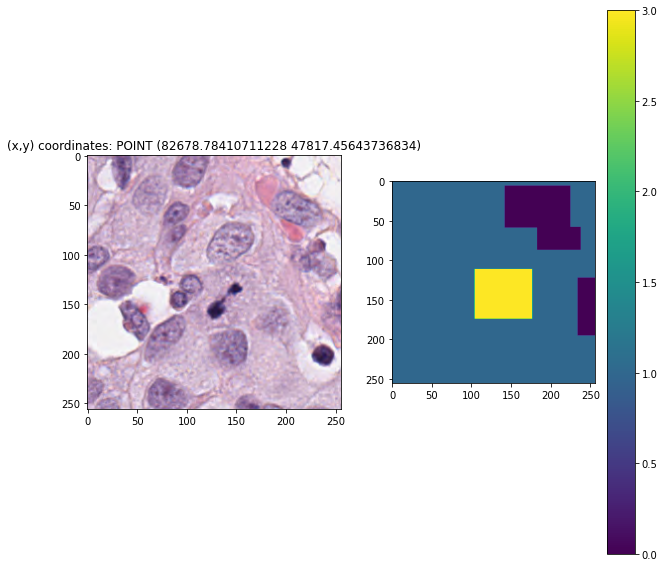

In [36]:
training_batch_generator = create_batch_iterator(user_config=user_config, mode=mode, cpus=cpus)
x_batch,y_batch,info = next(training_batch_generator)
idx = 1
fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("(x,y) coordinates: {}".format(info["sample_references"][idx]["point"]))
plt.imshow(x_batch[idx,:,:])
plt.subplot(1,2,2)
plt.imshow(y_batch[idx,:,:])
plt.colorbar()
plt.show()